## SARIMA Model
#### SARIMA models needs to be apply seasonal models. To prove the sesonality, we need to show the decomposition of the London house prices.

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('..//Data/ontario_retirement_house_investment_data.csv')
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check if there are any missing values in the 'Date' column


# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Filter for one city, for example 'London'
df_london = df[df['City'] == 'London']

# Display the first few rows to ensure it's set up correctly
df_london.head()

,City,Property_Price,Occupancy_Rate,Inflation_Rate,Population_Age_65+,Population_Age_65_Growth,Median_Age,Income_Level,Proximity_to_Healthcare,Walkability_Score,Crime_Rate,Property_Tax_Rate,Public_Transport_Access,Government_Incentives,Environmental_Quality,Senior_Living_Vacancy_Rate,Mental_Health_Programs,Memory_Care_Availability
Date,,,,,,,,,,,,,,,,,,
2010-01-01,London,848703,71,2.68,45565,2.13,42,76100,3,64,10,1,1,1,91.733793,12.690232,1,1
2010-02-01,London,986957,93,2.74,44538,2.77,47,38783,3,52,7,1,1,1,82.506671,5.833026,0,0
2010-03-01,London,943318,83,1.61,33963,0.70,42,59665,9,84,6,2,0,1,70.895383,13.320621,0,1
2010-04-01,London,934355,72,3.64,60330,1.96,44,40350,7,88,1,2,1,1,75.354998,9.718430,1,1
2010-05-01,London,860795,74,2.93,50283,2.65,46,57408,4,70,9,2,0,1,78.870686,12.438621,0,1


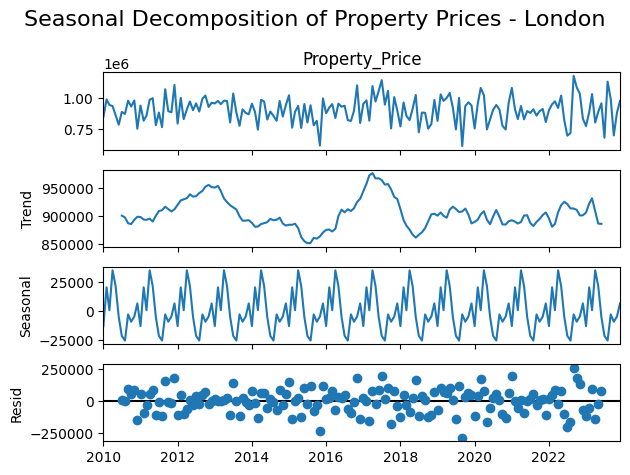

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition on the Property_Price series London
result = seasonal_decompose(df_london['Property_Price'], model='additive', period=12)

# Plot the decomposition
fig=result.plot()
fig.suptitle('Seasonal Decomposition of Property Prices - London', fontsize=16)
plt.tight_layout()
plt.show()

## This decomposition clearly shows a seasonality from repeating patterns or cycles which means we can apply SARIMA model.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Split the data into training (all but the last 12 months) and testing (last 12 months)
train_data = df_london.iloc[:-12]
test_data = df_london.iloc[-12:]

In [14]:

# Fit SARIMA model (SARIMAX can handle exogenous variables if needed)
# You may need to try different (p,d,q) and (P,D,Q,S) values to tune the model
sarima_model = SARIMAX(train_data['y'], 
                       order=(1, 1, 1),  # (p,d,q) parameters for ARIMA part
                       seasonal_order=(1, 1, 1, 12),  # (P,D,Q,S) for seasonal component, assuming monthly data
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fit = sarima_model.fit(disp=False)

KeyError: 'y'

In [13]:



# Forecast for the next 12 months (test set period)
forecast_sarima = sarima_fit.forecast(steps=12)

# Plot the forecast against actual test data
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['y'], label='Actual')
plt.plot(test_data.index, forecast_sarima, label='Forecasted (SARIMA)', color='red')
plt.legend()
plt.title('Actual vs Forecasted Retirement House Prices in London (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Property Price')
plt.grid(True)
plt.show()

# Calculate MAE and RMSE for SARIMA model
mae_sarima = mean_absolute_error(test_data['y'], forecast_sarima)
rmse_sarima = np.sqrt(root_mean_squared_error(test_data['y'], forecast_sarima))

# Print MAE and RMSE
print(f"SARIMA Mean Absolute Error (MAE): {mae_sarima}")
print(f"SARIMA Root Mean Squared Error (RMSE): {rmse_sarima}")


KeyError: 'y'